# **Library and Module Imports for Data Preprocessing and Machine Learning**

In [1]:
# Using ! to execute a command in the command line or terminal

# !pip install tldextract

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import joblib
import pandas as pd
import re
import tldextract
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data using Pandas**

In [3]:
# # Importing the 'drive' module from the 'google.colab' library to mount Google Drive
# from google.colab import drive

# # Mounting the Google Drive at the '/content/drive' directory
# drive.mount('/content/drive')


# Load your dataset
df = pd.read_csv('DomainData.csv')

# display first 5 rows
df.head(5)

,Domain,category
0,torontodining.com,1
1,valueregistry.com,1
2,dkcorp.com,1
3,canadaconnection.com,1
4,dentaltrader.com,1


#**Feature Engineering**

In [4]:
def get_alpha_word(word):
  res = ''
  for i in word:
    if i.isalpha():
      res += i
  return res.upper()

In [5]:
# Extracting the first part of the domain and converting it to lowercase
df['domain_name'] = df['Domain'].apply(lambda x: x.split('.')[0].lower())

# Counting the number of dots in the domain
df['domain_dots'] = df['Domain'].apply(lambda x: x.count('.'))

# Checking if the domain name contains a hyphen
df['domain_have_hyphen'] = df['domain_name'].apply(lambda x: 1 if '-' in x else 0)

# Counting the number of vowels in the domain name
df['domain_vowel_count'] = df['domain_name'].apply(lambda x: sum(1 for char in x if char.lower() in 'aeiou'))

# Checking if the domain name contains special characters
df['domain_have_special_char'] = df['domain_name'].apply(lambda x: 1 if not x.isalnum() else 0)

# Creating a binary feature based on whether the domain name is a common word
common_words = set(['example1', 'example2', 'example3', 'domain', 'web', 'tech', 'online', 'blog', 'site'])
df['domain_is_common'] = df['domain_name'].apply(lambda x: 1 if x in common_words else 0)

df['Subdomain'] = df['Domain'].apply(lambda x: tldextract.extract(x).subdomain)

# Calculating the length of the subdomain
df['SubdomainLength'] = df['Subdomain'].apply(lambda x: len(x) if x else 0)

# Calculating the length of the domain name
df['domain_length'] = df['domain_name'].apply(lambda x: len(x))

# Checking if the domain name contains digits
df['domain_have_digit'] = df['domain_name'].apply(lambda x: 0 if len(re.findall('\d', x)) == 0 else 1)

# Creating a binary feature based on whether all characters in the domain name are digits
df['domain_all_digits'] = df.apply(lambda x: 1 if len(re.findall('\d', x['domain_name'])) == x['domain_length'] else 0, axis=1)

df['special_char_count'] = df['Domain'].apply(lambda x: sum(1 for char in x.split('.')[0] if not char.isalpha()))

df

<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_16420\555304840.py:29: SyntaxWarning: invalid escape sequence '\d'
  df['domain_have_digit'] = df['domain_name'].apply(lambda x: 0 if len(re.findall('\d', x)) == 0 else 1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16420\555304840.py:32: SyntaxWarning: invalid escape sequence '\d'
  df['domain_all_digits'] = df.apply(lambda x: 1 if len(re.findall('\d', x['domain_name'])) == x['domain_length'] else 0, axis=1)


,Domain,category,domain_name,domain_dots,domain_have_hyphen,domain_vowel_count,domain_have_special_char,domain_is_common,Subdomain,SubdomainLength,domain_length,domain_have_digit,domain_all_digits,special_char_count
0,torontodining.com,1,torontodining,1,0,5,0,0,,0,13,0,0,0
1,valueregistry.com,1,valueregistry,1,0,5,0,0,,0,13,0,0,0
2,dkcorp.com,1,dkcorp,1,0,1,0,0,,0,6,0,0,0
3,canadaconnection.com,1,canadaconnection,1,0,7,0,0,,0,16,0,0,0
4,dentaltrader.com,1,dentaltrader,1,0,4,0,0,,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708034,kkk15.com,5,kkk15,1,0,0,0,0,,0,5,1,0,2
8708035,cubics.com,5,cubics,1,0,2,0,0,,0,6,0,0,0
8708036,nationalpainreport.com,5,nationalpainreport,1,0,8,0,0,,0,18,0,0,0
8708037,colormedical.com,5,colormedical,1,0,5,0,0,,0,12,0,0,0


In [6]:
extension_scores = {'com': 3, 'net': 2, 'org': 1}

df['extension_score'] = df['Domain'].apply(lambda x: extension_scores.get(x.split('.')[-1].lower(), 0))

df

,Domain,category,domain_name,domain_dots,domain_have_hyphen,domain_vowel_count,domain_have_special_char,domain_is_common,Subdomain,SubdomainLength,domain_length,domain_have_digit,domain_all_digits,special_char_count,extension_score
0,torontodining.com,1,torontodining,1,0,5,0,0,,0,13,0,0,0,3
1,valueregistry.com,1,valueregistry,1,0,5,0,0,,0,13,0,0,0,3
2,dkcorp.com,1,dkcorp,1,0,1,0,0,,0,6,0,0,0,3
3,canadaconnection.com,1,canadaconnection,1,0,7,0,0,,0,16,0,0,0,3
4,dentaltrader.com,1,dentaltrader,1,0,4,0,0,,0,12,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708034,kkk15.com,5,kkk15,1,0,0,0,0,,0,5,1,0,2,3
8708035,cubics.com,5,cubics,1,0,2,0,0,,0,6,0,0,0,3
8708036,nationalpainreport.com,5,nationalpainreport,1,0,8,0,0,,0,18,0,0,0,3
8708037,colormedical.com,5,colormedical,1,0,5,0,0,,0,12,0,0,0,3


In [7]:
# Assuming 'category' is the column to be one-hot encoded
df_encoded = pd.get_dummies(df, columns=['category'])
df.head()

,Domain,category,domain_name,domain_dots,domain_have_hyphen,domain_vowel_count,domain_have_special_char,domain_is_common,Subdomain,SubdomainLength,domain_length,domain_have_digit,domain_all_digits,special_char_count,extension_score
0,torontodining.com,1,torontodining,1,0,5,0,0,,0,13,0,0,0,3
1,valueregistry.com,1,valueregistry,1,0,5,0,0,,0,13,0,0,0,3
2,dkcorp.com,1,dkcorp,1,0,1,0,0,,0,6,0,0,0,3
3,canadaconnection.com,1,canadaconnection,1,0,7,0,0,,0,16,0,0,0,3
4,dentaltrader.com,1,dentaltrader,1,0,4,0,0,,0,12,0,0,0,3


In [8]:
# Features
col_features = ['domain_dots', 'domain_have_hyphen', 'domain_vowel_count', 'domain_have_special_char', 'domain_is_common', 'SubdomainLength', 'domain_length', 'domain_have_digit', 'domain_all_digits', 'special_char_count', 'special_char_count', 'extension_score']

In [9]:
df.isnull().sum()

Domain                      0
category                    0
domain_name                 0
domain_dots                 0
domain_have_hyphen          0
domain_vowel_count          0
domain_have_special_char    0
domain_is_common            0
Subdomain                   0
SubdomainLength             0
domain_length               0
domain_have_digit           0
domain_all_digits           0
special_char_count          0
extension_score             0
dtype: int64

In [10]:

# final_df = df.groupby('category', group_keys=False).head(10000)
final_df = df

# final_df

<Axes: ylabel='count'>

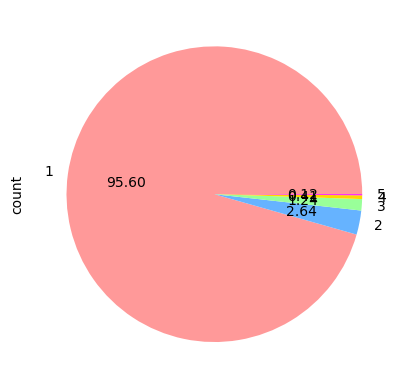

In [11]:
# Specify the target variable
y = final_df['category']

# Specify the feature matrix
X = final_df[col_features]

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700', '#FF00FF']

# target label visualisation
y.value_counts().plot.pie(autopct='%.2f', colors=colors)

# **Splitting the Dataset into Training and Testing Sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(6966431, 12)

# **Class Imbalance Mitigation: SMOTE Oversampling**

In [14]:
# # Check the class distribution before oversampling
# print("Class distribution before oversampling:", Counter(y))

# smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
# X_train_resampled, y_train_resampled = X_train, y_train

# # Check the class distribution after oversampling
# print("Class distribution after oversampling:", Counter(y_train_resampled))

# # Visualize the class distribution before and after oversampling
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Before oversampling
# before_oversample_labels = [f"{key} ({value})" for key, value in Counter(y).items()]
# axes[0].pie(Counter(y).values(), labels=before_oversample_labels, autopct="%.2f")
# axes[0].set_title("Class Distribution Before Oversampling")
# axes[0].legend(Counter(y).keys())

# # After oversampling
# after_oversample_labels = [f"{key} ({value})" for key, value in Counter(y_train_resampled).items()]
# axes[1].pie(Counter(y_train_resampled).values(), labels=after_oversample_labels, autopct="%.2f")
# axes[1].set_title("Class Distribution After Oversampling")
# axes[1].legend(Counter(y_train_resampled).keys())

# plt.show()

In [15]:
# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Combine SMOTE and Edited Nearest Neighbors (SMOTEENN) for both oversampling and undersampling
# smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42, n_jobs=-1)
# X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



Class distribution before oversampling: Counter({1: 8324707, 2: 229567, 3: 107932, 4: 35454, 5: 10379})


c:\Users\Asus\anaconda3\envs\my_env\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


(250000, 12)
(250000,)
Class distribution after oversampling: Counter({1: 50000, 2: 50000, 3: 50000, 4: 50000, 5: 50000})


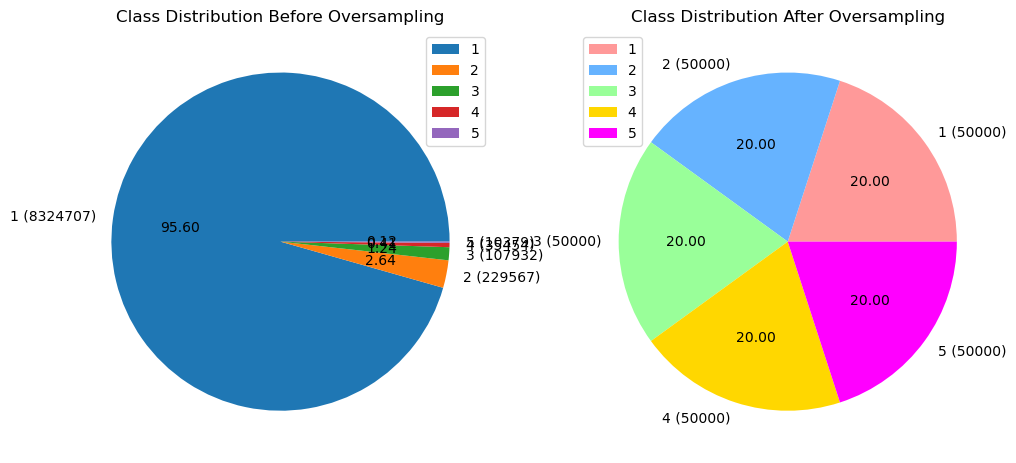

In [16]:
# Convert y_train_resampled to DataFrame
y_train_resampled = y_train_resampled.to_frame(name='category')

# Group by 'category' and limit to 50,000 samples per class
X_train_resampled['category'] = y_train_resampled['category']
X_train_resampled = X_train_resampled.groupby('category', group_keys=False).head(50000)
y_train_resampled = X_train_resampled['category']

X_train_resampled = X_train_resampled.drop(columns=['category'])

# Step 2: Ensure X_test matches the feature set
X_test = X_test[col_features]

print(X_train_resampled.shape)
print(y_train_resampled.shape)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))

# Visualize the class distribution before and after oversampling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before oversampling
before_oversample_labels = [f"{key} ({value})" for key, value in Counter(y).items()]
axes[0].pie(Counter(y).values(), labels=before_oversample_labels, autopct="%.2f")
axes[0].set_title("Class Distribution Before Oversampling")
axes[0].legend(Counter(y).keys())

# After oversampling
after_oversample_labels = [f"{key} ({value})" for key, value in Counter(y_train_resampled).items()]
axes[1].pie(Counter(y_train_resampled).values(), labels=after_oversample_labels, autopct="%.2f", colors=colors)
axes[1].set_title("Class Distribution After Oversampling")
axes[1].legend(Counter(y_train_resampled).keys())

plt.show()

In [17]:
# Drop duplicate columns in X_test
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Ensure the columns match
X_test = X_test[X_train_resampled.columns]

# Check columns again
print("Columns in X_train_resampled (after fix):", X_train_resampled.columns.tolist())
print("Columns in X_test (after fix):", X_test.columns.tolist())

# Confirm alignment
assert list(X_train_resampled.columns) == list(X_test.columns), "Column mismatch between X_train_resampled and X_test"


Columns in X_train_resampled (after fix): ['domain_dots', 'domain_have_hyphen', 'domain_vowel_count', 'domain_have_special_char', 'domain_is_common', 'SubdomainLength', 'domain_length', 'domain_have_digit', 'domain_all_digits', 'special_char_count', 'special_char_count', 'extension_score']
Columns in X_test (after fix): ['domain_dots', 'domain_have_hyphen', 'domain_vowel_count', 'domain_have_special_char', 'domain_is_common', 'SubdomainLength', 'domain_length', 'domain_have_digit', 'domain_all_digits', 'special_char_count', 'special_char_count', 'extension_score']


# **Building Models with different Algorithms**

Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 42, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}


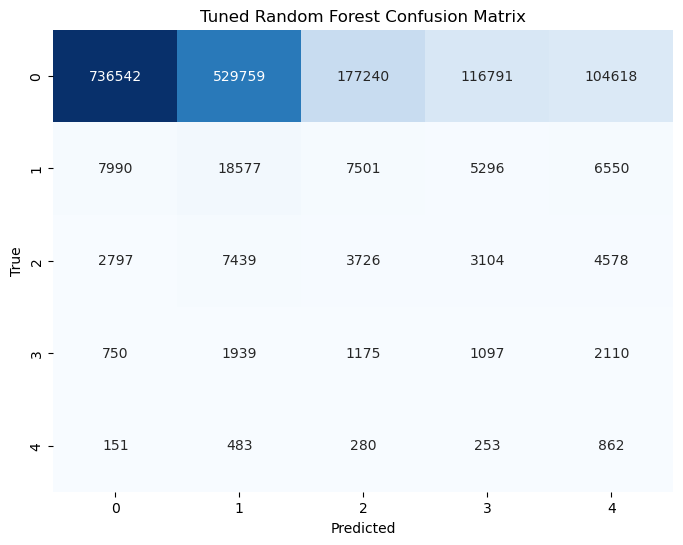

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.44      0.61   1664950
           2       0.03      0.40      0.06     45914
           3       0.02      0.17      0.04     21644
           4       0.01      0.16      0.02      7071
           5       0.01      0.42      0.01      2029

    accuracy                           0.44   1741608
   macro avg       0.21      0.32      0.15   1741608
weighted avg       0.94      0.44      0.59   1741608

Tuned Random Forest Accuracy: 0.4368399777676722


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import os

rf_model_path = 'best_rf_classifier_random_search.joblib'

if os.path.exists(rf_model_path):
    # Load the saved model
    print("Loading the saved model...")
    best_rf_classifier = joblib.load(rf_model_path)
else:
    # Define the parameter distribution for Random Forest
    # param_dist = {
    #     'n_estimators': randint(50, 200),
    #     'max_depth': [None] + list(randint(1, 20).rvs(10)),
    #     'min_samples_split': randint(2, 10),
    #     'min_samples_leaf': randint(1, 5)
    # }
    param_dist = {
        'n_estimators': randint(100, 300),  # Moderate range to avoid excessive trees
        'max_depth': [None] + list(randint(10, 50).rvs(5)),  # Focus on deeper trees, up to 50
        'min_samples_split': randint(2, 20),  # Allow splits requiring more samples for simplicity
        'min_samples_leaf': randint(1, 10),  # Prevent overly small leaves
        'max_features': ['sqrt', 'log2'],  # Commonly effective for classification
        'bootstrap': [True],  # Fixed to True for simplicity
        'class_weight': [None, 'balanced']  # Evaluate impact of balancing
    }

    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Create RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                    n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

    # Fit the model on the resampled training data with randomized search
    random_search.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)

    # Save the best model for future predictions
    best_rf_classifier = random_search.best_estimator_
    joblib.dump(best_rf_classifier, 'best_rf_classifier_random_search.joblib')

# Make predictions on the test set with the best model
y_pred_rf_tuned = best_rf_classifier.predict(X_test)

# Confusion matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

# Evaluate the accuracy of the tuned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)


Best Parameters for KNN (Randomized Search): {'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}


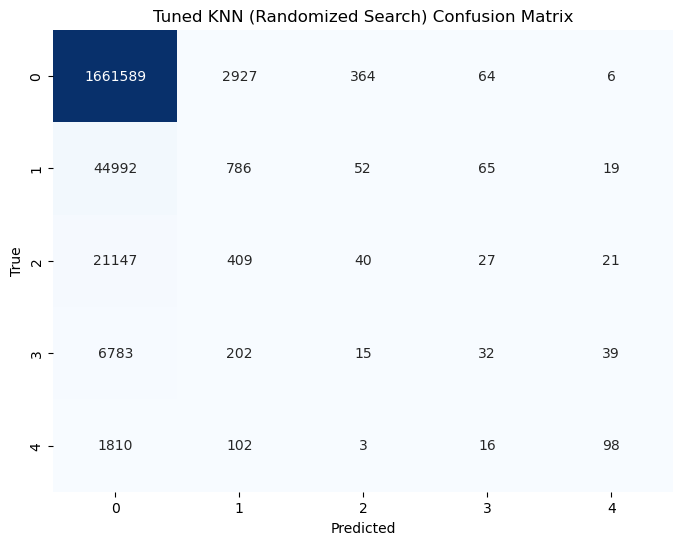

Tuned KNN (Randomized Search) Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98   1664950
           2       0.18      0.02      0.03     45914
           3       0.08      0.00      0.00     21644
           4       0.16      0.00      0.01      7071
           5       0.54      0.05      0.09      2029

    accuracy                           0.95   1741608
   macro avg       0.38      0.21      0.22   1741608
weighted avg       0.92      0.95      0.94   1741608

Tuned KNN (Randomized Search) Accuracy: 0.9546034469295043


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import os

knn_model_path = 'best_knn_classifier_random_search.joblib'

if os.path.exists(knn_model_path):
    # Load the saved model
    print("Loading the saved model...")
    best_knn_classifier_random = joblib.load(knn_model_path)
else:
    # Define the parameter distribution for KNN
    # param_dist_knn = {
    #     'n_neighbors': randint(3, 20),
    #     'weights': ['uniform', 'distance'],
    #     'p': [1, 2]
    # }
    param_dist_knn = {
    'n_neighbors': randint(5, 30),  # Extended upper limit for robustness
    'weights': ['uniform', 'distance'],  # Keep both options
    'p': [1, 2],  # Standard distance metrics
    }


    # Create a KNN Classifier
    knn_classifier = KNeighborsClassifier()

    # Create RandomizedSearchCV
    random_search_knn = RandomizedSearchCV(estimator=knn_classifier, param_distributions=param_dist_knn,
                                            n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

    # Fit the model on the resampled training data with randomized search
    random_search_knn.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params_knn_random = random_search_knn.best_params_
    print("Best Parameters for KNN (Randomized Search):", best_params_knn_random)

    # Save the best model for future predictions
    best_knn_classifier_random = random_search_knn.best_estimator_
    joblib.dump(best_knn_classifier_random, 'best_knn_classifier_random_search.joblib')

# Make predictions on the test set with the best model
y_pred_knn_tuned_random = best_knn_classifier_random.predict(X_test)

# Confusion matrix
cm_knn_tuned_random = confusion_matrix(y_test, y_pred_knn_tuned_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_tuned_random, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned KNN (Randomized Search) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Tuned KNN (Randomized Search) Classification Report:\n", classification_report(y_test, y_pred_knn_tuned_random))

# Evaluate the accuracy of the tuned model
accuracy_knn_tuned_random = accuracy_score(y_test, y_pred_knn_tuned_random)
print("Tuned KNN (Randomized Search) Accuracy:", accuracy_knn_tuned_random)

Model not found. Training a new model...
Best Parameters for Decision Tree (Randomized Search): {'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 13, 'splitter': 'best'}


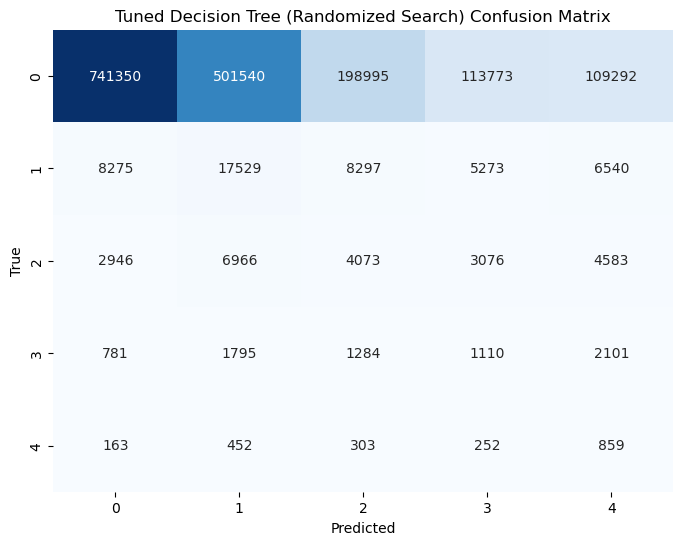

Tuned Decision Tree (Randomized Search) Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.45      0.61   1664950
           2       0.03      0.38      0.06     45914
           3       0.02      0.19      0.03     21644
           4       0.01      0.16      0.02      7071
           5       0.01      0.42      0.01      2029

    accuracy                           0.44   1741608
   macro avg       0.21      0.32      0.15   1741608
weighted avg       0.94      0.44      0.59   1741608

Tuned Decision Tree (Randomized Search) Accuracy: 0.43920388514522213


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import os

dc_model_path = 'best_dt_classifier_random_search.joblib'

if os.path.exists(dc_model_path):
    # Load the saved model
    print("Loading the saved model...")
    best_dt_classifier_random = joblib.load(dc_model_path)
else:
    print("Model not found. Training a new model...")
    # Define the parameter distribution for Decision Tree
    # param_dist_dt = {
    #     'criterion': ['gini', 'entropy'],
    #     'splitter': ['best', 'random'],
    #     'max_depth': [None] + list(randint(1, 20).rvs(10)),
    #     'min_samples_split': randint(2, 10),
    #     'min_samples_leaf': randint(1, 5)
    # }

    param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(randint(1, 30).rvs(10)),  # Extended depth range
    'min_samples_split': randint(2, 20),  # Larger range for splitting
    'min_samples_leaf': randint(1, 5)  # Maintain as-is
    }


    # Create a Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Create RandomizedSearchCV
    random_search_dt = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist_dt,
                                        n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

    # Fit the model on the resampled training data with randomized search
    random_search_dt.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params_dt_random = random_search_dt.best_params_
    print("Best Parameters for Decision Tree (Randomized Search):", best_params_dt_random)

    # Save the best model for future predictions
    best_dt_classifier_random = random_search_dt.best_estimator_
    joblib.dump(best_dt_classifier_random, 'best_dt_classifier_random_search.joblib')

# Make predictions on the test set with the best model
y_pred_dt_tuned_random = best_dt_classifier_random.predict(X_test)

# Confusion matrix
cm_dt_tuned_random = confusion_matrix(y_test, y_pred_dt_tuned_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_tuned_random, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned Decision Tree (Randomized Search) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Tuned Decision Tree (Randomized Search) Classification Report:\n", classification_report(y_test, y_pred_dt_tuned_random))

# Evaluate the accuracy of the tuned model
accuracy_dt_tuned_random = accuracy_score(y_test, y_pred_dt_tuned_random)
print("Tuned Decision Tree (Randomized Search) Accuracy:", accuracy_dt_tuned_random)

# **Predicting for a Specific Domain**

In [56]:
# Section: Predicting for a Specific Domain

# Assume I want to predict a Specific Domain
specific_domain = 'flexcom.com'

# Assuming the necessary variables are defined
common_words = ['example', 'domain', 'test']  # Define common words as needed
extension_scores = {
    'com': 1, 'org': 0.8, 'net': 0.6  # Define the extension scores
}

train_feature_names = best_rf_classifier.feature_names_in_

# Now proceed as before to create the specific domain DataFrame
specific_domain_df = pd.DataFrame({
    'domain_dots': [specific_domain.count('.')],  # Counting dots
    'domain_have_hyphen': [1 if '-' in specific_domain.split('.')[0] else 0],  # Checking for hyphens
    'domain_vowel_count': [sum(1 for char in specific_domain.split('.')[0] if char.lower() in 'aeiou')],  # Vowel count
    'domain_have_special_char': [1 if not specific_domain.split('.')[0].isalnum() else 0],  # Special char check
    'domain_is_common': [1 if specific_domain.split('.')[0] in common_words else 0],  # Common word check
    'SubdomainLength': [len(tldextract.extract(specific_domain).subdomain)],  # Subdomain length
    'domain_length': [len(specific_domain.split('.')[0])],  # Domain part length
    'domain_have_digit': [0 if len(re.findall('\d', specific_domain.split('.')[0])) == 0 else 1],  # Digit presence
    'domain_all_digits': [1 if len(re.findall('\d', specific_domain.split('.')[0])) == len(specific_domain.split('.')[0]) else 0],  # All digits
    'special_char_count': [sum(1 for char in specific_domain.split('.')[0] if not char.isalnum())],  # Special chars
    'extension_score': [extension_scores.get(specific_domain.split('.')[-1].lower(), 0)]  # Extension score
})

# Extract the features in the correct order
specific_domain_features = specific_domain_df[train_feature_names]

# Make predictions using the trained model
prediction = best_rf_classifier.predict(specific_domain_features)

# Print the prediction
print("Prediction for", specific_domain, ":", prediction[0])

Prediction for flexcom.com : 5


<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_16420\2622699069.py:23: SyntaxWarning: invalid escape sequence '\d'
  'domain_have_digit': [0 if len(re.findall('\d', specific_domain.split('.')[0])) == 0 else 1],  # Digit presence
C:\Users\Asus\AppData\Local\Temp\ipykernel_16420\2622699069.py:24: SyntaxWarning: invalid escape sequence '\d'
  'domain_all_digits': [1 if len(re.findall('\d', specific_domain.split('.')[0])) == len(specific_domain.split('.')[0]) else 0],  # All digits


In [ ]:
# from nbconvert import HTMLExporter
# import nbformat


notebook_filename = '/content/drive/MyDrive/domain_prediction.ipynb'

# Read the notebook
with open(notebook_filename, 'r', encoding='utf-8') as notebook_file:
    notebook_content = notebook_file.read()

# Convert notebook to HTML
notebook = nbformat.reads(notebook_content, as_version=4)
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook)

# Save the HTML content to a file
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as html_file:
    html_file.write(body)